In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
full_data = pd.read_csv('data.csv', index_col=);full_data

,benchmark,env,inst,count,time
0,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
1,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
2,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000014
3,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
4,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
5,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
6,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000014
7,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
8,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013
9,alu,gpu,"v_add_f32 v1, v2, v3",0,0.000013


In [6]:
data = full_data.groupby(['inst', 'count']).agg(np.mean).reset_index();
data

,inst,count,time
0,"v_add_f32 v1, v2, v3",0,0.000013
1,"v_add_f32 v1, v2, v3",4,0.000013
2,"v_add_f32 v1, v2, v3",8,0.000014
3,"v_add_f32 v1, v2, v3",12,0.000013
4,"v_add_f32 v1, v2, v3",16,0.000013
5,"v_add_f32 v1, v2, v3",20,0.000013
6,"v_add_f32 v1, v2, v3",24,0.000014
7,"v_add_f32 v1, v2, v3",28,0.000013
8,"v_add_f32 v1, v2, v3",32,0.000014
9,"v_add_f32 v1, v2, v3",36,0.000013


(1e-05, 2e-05)

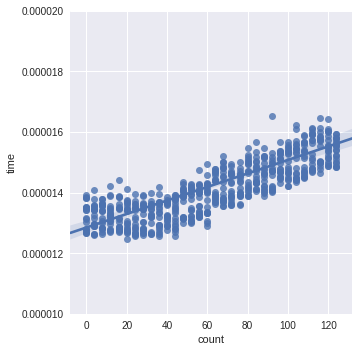

In [13]:
lm = sns.lmplot('count', 'time', full_data)
lm.axes[0, 0].set_ylim(1e-5, 2e-5)

In [14]:
data_wf = data[(data['inst']=='v_add_f32 v1, v2, v3') & (data['env']=='gpu')];data_wf
result = sm.ols(formula="time ~ count", data=data_wf).fit()
result.params

KeyError: 'env'